In [ ]:
# Homework 2 Part 1 (due 7/07/2024)

# Multivariate linear regression with within-sample validation

### Objective
In this project, you will identify relationships between variables via single-variable and multivariable linear regression using the python library `sci-kit learn`. You will practice assessing the model fit within sample and out of sample.

### Step 1
The following code snippet (1) loads the diabetes dataset from the sci-kit learn package, (2) fits a linear regression to the first variable in that data set, (3) calculate a t statistics for the estimated model parameters, (4) calculates the within-sample R2, and (5) plots the data and the model. Review and test the code.

### Step 2
Write code that  fits a linear models for EACH INDEPENDENT VARIABLE in the data set. For each of the resulting models, (1) calculate a t statistic for the estimated model parameters, (2) calculate the within-sample RSS, MSE, RSE, and R^2. Plot the results for the model that has the best quality of fit.

### Step 3
Write code that  fits a multivariate linear model for ALL INDEPENDENT VARIABLE in the data set. (1) calculate an f statistic on the estimated model parameters, (2) calculate the within-sample RSS, MSE, RSE, and R^2.

### Step 4
Test the information content of each variable in the multivariate model by calculating an f statistic with respect to a reduced model. Are the three variables with the highest f statistic also the variables with the best-fitting single-variable models? Explain what may lead to differences in the variable rankings.

### Step 5
Look up how to use the function `train_test_split` from `sklearn.model_selection` split a dataset into a training set and a test set. Repeat steps 2 and 3 on the training set. For each model, also calculate RSS, MSE, RSE, and R2 on the test set. For each linear model, comment on how RSE and R2 change when moving from the training set to the test. 

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [17]:
# Read-in the diabetes dataset as a pandas DataFrame
diabetes = datasets.load_diabetes(as_frame=True)

# Get independent variables
X = diabetes.data

# Get dependent variable
y = diabetes.target

# Let's look at the data
X.describe()

R2 0.1462936157229343


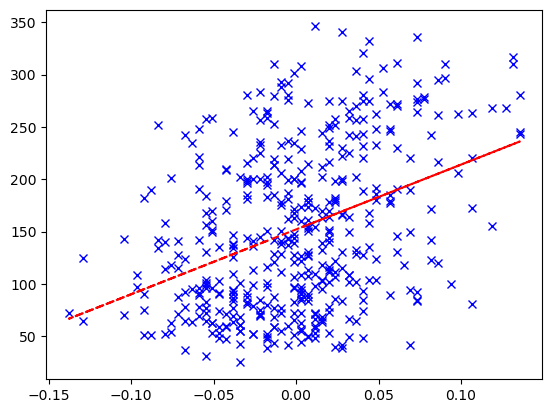

In [72]:
# initialize model
model = LinearRegression()

# get variable names from column header in the data frame
var_names = X.columns

# select first variable
var_name1 = var_names[0]

# select data associated with the first variable
x1 = X[vname]

# turn that dataframe column into a nx1 numpy array
x1_data = np.array([x1.to_numpy()]).T

# fit model
_ = model.fit(x1_data,y.to_numpy())

# get model predictions for each x value
yHat = model.predict(x1_data)

# get residuals
resid = yHat-y

# get R2 value
R2 = model.score(x1_data,y)
print('R2', R2)

# make a plot
plt.subplot(111)

# plot data
plt.plot(x1, y, marker='x', lw=0, color='blue')

# plot fit
plt.plot(x1, yHat, ls='--', color='red')

In [ ]:
# Step 2:
Best_R2 = 0
Best_index = 100
i = 0
import math

# for all independent variables (there are 10)
while i < 10:
    print(i + 1)

    # select the ith variable
    var_namei = var_names[i]

    # select data associated with the ith variable
    x = X[var_namei]

    # turn that dataframe column into a nx1 numpy array
    x_data = np.array([x.to_numpy()]).T

    # fit model
    _ = model.fit(x_data,y.to_numpy())

    # get model predictions for each x value
    yHat = model.predict(x_data)

    # get residuals
    resid = yHat-y

    # get R2 value
    R2 = model.score(x_data,y)
    print('R2 is: ', R2)

    # get the Residual Sum of Squares by adding the squares of all the values in resid, which contain all the y^ - y values.
    RSS = 0
    for value in resid:
        RSS = RSS + value*value
    
    print('RSS is: ', RSS)
    
    # n?
    n = len(x)

    # MSE is Mean Squared Error. To get average, divide RSS by n:
    MSE = RSS/n
    print('MSE is: ', MSE)

    # RSE is sqrt(RSS / (n-2))
    RSE = math.sqrt(RSS/(n-2))

    print('RSE is: ', RSE)
    
    # SE(B1)^2 is RSE^2/[sum of (xi-x^bar)^2] for all xi based on textbook
    # x bar is average of 'x's
    x_sum = 0
    for x_value in x_data:
        x_sum = x_sum + x_value

    x_bar = x_sum/n

    # calculate SE(B1)
    x_minus_x_bar_sum = 0
    for x_value in x_data:
        x_minus_x_bar_sum = x_minus_x_bar_sum + x_value * x_value

    SE_B1 = math.sqrt(RSE * RSE / (x_minus_x_bar_sum))
        
    # Get the coefficient B1
    B1 = model.coef_
    print("Coefficient is: ", B1)
    
    # calculate t. t = B1/SE(B1)
    t = B1/SE_B1

    print('t value is: ', t)

    # compare fit of model to best previous one. If current fit is better, replace Best R2 with current and update corresponding index
    if R2 > Best_R2:
        Best_R2  = R2
        Best_index = i

    # once we've gone through every variable, plot the best-fit model
    if i == 9:
        # select that variable
        var_namei = var_names[Best_index]

        # select data associated with that variable
        x = X[var_namei]

        # turn that dataframe column into a nx1 numpy array
        x_data = np.array([x.to_numpy()]).T

        # fit model
        _ = model.fit(x_data,y.to_numpy())

        # get model predictions for each x value
        yHat = model.predict(x_data)

        # make a plot
        plt.subplot(111)
        
        # plot data
        plt.plot(x, y, marker='x', lw=0, color='blue')

        # plot fit
        plt.plot(x, yHat, ls='--', color='red')
        
        print('Best fit model uses independent variable: ',1+Best_index)

    # increment index
    i = i + 1

In [ ]:
# Step 3
model = LinearRegression()
_ = model.fit(X,y)

# get model predictions for each x value
yHat = model.predict(X)

for coefficient in model.coef_:
    print(coefficient)

# calculate RSS by summing all (yhat-y)^2
resid = yHat-y
RSS = 0
for each_element in resid:
    RSS = RSS + (each_element)*each_element
print('RSS is: ', RSS)

n = len(yHat)

# TSS is sum of all (ybar-y)^2
# first calculate y bar
sumY = 0
for yvalue in y:
    sumY = sumY + yvalue
yBar = sumY/n

TSS = 0
# sum all the squares of y-ybar to get TSS
for each_element in yHat:
    TSS = TSS + (each_element-yBar)*(each_element-yBar)

# calculate F-stat: (TSS-RSS)/p/(RSS/(n-p-1)) where p is number of distinct predictors (ind. variables) = 10
p = 10
f_stat = (TSS-RSS)/p/RSS/(n-p-1)
print('f-stat is: ', f_stat)

# get R2 value
R2 = model.score(X,y)
print('R2 is: ', R2)
    
# MSE is Mean Squared Error. To get average, divide RSS by n:
MSE = RSS/n
print('MSE is: ', MSE)

# RSE is sqrt(RSS / (n-2))
RSE = math.sqrt(RSS/(n-2))
print('RSE is: ', RSE)

In [ ]:
# Step 4

# Calculate a f-stat for each variable
# number of independent variables
p = len(var_names)
i = 0
while i < p:
    print(i + 1)
    # initialize model
    model = LinearRegression()

    # select first variable
    var_name = var_names[i]

    # select data associated with the first variable
    x = X[var_name]

    # turn that dataframe column into a nx1 numpy array
    x_data = np.array([x.to_numpy()]).T

    # fit model
    _ = model.fit(x_data,y.to_numpy())

    # get model predictions for each x value
    yHat = model.predict(x_data)

    # calculate RSS by summing all (yhat-y)^2
    resid = yHat-y
    RSS = 0
    for each_element in resid:
        RSS = RSS + (each_element)*each_element

    n = len(yHat)

    # TSS is sum of all (ybar-y)^2
    # first calculate y bar
    sumY = 0
    for yvalue in y:
        sumY = sumY + yvalue
    yBar = sumY/n

    TSS = 0
    # sum all the squares of y-ybar to get TSS
    for each_element in yHat:
        TSS = TSS + (each_element-yBar)*(each_element-yBar)

    # calculate F-stat: (TSS-RSS)/p/(RSS/(n-p-1)) where p is number of distinct predictors (ind. variables) = 10
    f_stat = (TSS-RSS)/p/RSS/(n-p-1)

    print('f_stat is: ', f_stat)
    
    i = i + 1

# the three highest values (by highest f-stat) are variables # 3, 9, 4 in decreasing order. This is consistent with the highest t-values in single variable models.

In [ ]:
# Step 5

test_fraction = 0.3
from sklearn.model_selection import train_test_split

# repeat step 2 with split
Best_R2 = 0
Best_index = 100
i = 0
j = 0

# for all independent variables (there are 10)
while i < 10:
    # calculate first for train, second for test
    while j < 2:
        print('Training results:')
        print(i + 1)
        
        # select the ith variable
        var_namei = var_names[i]

        # select data associated with the ith variable
        x = X[var_namei]

        X_train, X_test, y_train, y_test = train_test_split(
        x, y, random_state = 100, test_size=test_fraction, shuffle=True)

        # turn that dataframe column into a nx1 numpy array (first train data, then test)
        if j == 0:
            x_info = X_train
            y_info = y_train
        if j == 1:
            x_info = X_test
            y_info = y_test

        x_data = np.array([x_info.to_numpy()]).T

        # fit model with either train or test data
        _ = model.fit(x_info,y_info.to_numpy())

        # get model predictions for each x value
        yHat = model.predict(x_data)

        # get residuals
        resid = yHat-y_info

        # get R2 value
        R2 = model.score(x_data,y_info)
        print('R2 is: ', R2)

        # get the Residual Sum of Squares by adding the squares of all the values in resid, which contain all the y^ - y values.
        RSS = 0
        for value in resid:
            RSS = RSS + value*value
        
        print('RSS is: ', RSS)
        
        # n?
        n = len(x)

        # MSE is Mean Squared Error. To get average, divide RSS by n:
        MSE = RSS/n
        print('MSE is: ', MSE)

        # RSE is sqrt(RSS / (n-2))
        RSE = math.sqrt(RSS/(n-2))

        print('RSE is: ', RSE)
        
        # SE(B1)^2 is RSE^2/[sum of (xi-x^bar)^2] for all xi based on textbook
        # x bar is average of 'x's
        x_sum = 0
        for x_value in x_data:
            x_sum = x_sum + x_value

        x_bar = x_sum/n

        # calculate SE(B1)
        x_minus_x_bar_sum = 0
        for x_value in x_data:
            x_minus_x_bar_sum = x_minus_x_bar_sum + x_value * x_value

        SE_B1 = math.sqrt(RSE * RSE / (x_minus_x_bar_sum))
            
        # Get the coefficient B1
        B1 = model.coef_
        print("Coefficient is: ", B1)
        
        # calculate t. t = B1/SE(B1)
        t = B1/SE_B1

        print('t value is: ', t)

        j = j + 1

    # increment index
    i = i + 1

# Repeat Step 3 for train and test

# Calculate a f-stat for each variable
# number of independent variables
p = len(var_names)
i = 0
while i < p:
    # split into test and training
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state = 100, test_size=test_fraction, shuffle=True)

    # turn that dataframe column into a nx1 numpy array (first train data, then test)
    if j == 0:
        x_info = X_train
        y_info = y_train
    if j == 1:
        x_info = X_test
        y_info = y_test
        
    # initialize model
    model = LinearRegression()

    # select first variable
    var_name = var_names[i]

    # select data associated with the first variable
    x = X[var_name]

    # turn that dataframe column into a nx1 numpy array
    x_data = np.array([x_info.to_numpy()]).T

    # fit model
    _ = model.fit(x_data,y_info.to_numpy())

    # get model predictions for each x value
    yHat = model.predict(x_data)

    # calculate RSS by summing all (yhat-y_info)^2
    resid = yHat-y_info
    RSS = 0
    for each_element in resid:
        RSS = RSS + (each_element)*each_element

    n = len(yHat)

    # TSS is sum of all (ybar-y)^2
    # first calculate y bar
    sumY = 0
    for yvalue in y_info:
        sumY = sumY + yvalue
    yBar = sumY/n

    TSS = 0
    # sum all the squares of y-ybar to get TSS
    for each_element in yHat:
        TSS = TSS + (each_element-yBar)*(each_element-yBar)

    # calculate F-stat: (TSS-RSS)/p/(RSS/(n-p-1)) where p is number of distinct predictors (ind. variables) = 10
    f_stat = (TSS-RSS)/p/RSS/(n-p-1)

    print('f_stat is: ', f_stat)
    
    i = i + 1
